In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv('./data/santander_train.csv')
test_df = pd.read_csv('./data/santander_test.csv')

In [6]:
print(train_df.shape)
train_df.head(3)

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
print(train_df['TARGET'].value_counts())
print(train_df['TARGET'].value_counts(normalize=True))

TARGET
0    73012
1     3008
Name: count, dtype: int64
TARGET
0    0.960431
1    0.039569
Name: proportion, dtype: float64


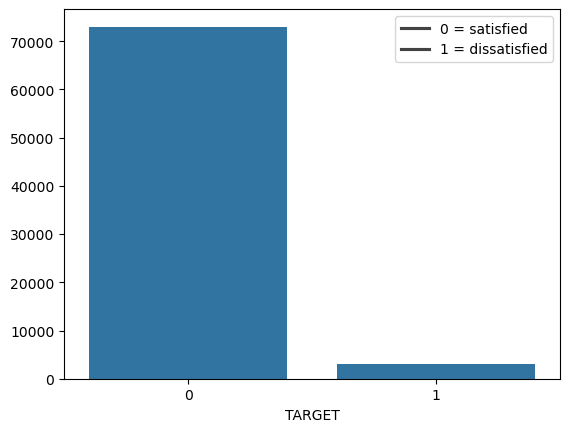

In [17]:
target_counts = train_df['TARGET'].value_counts().sort_index()
sns.barplot(x=target_counts.index, y=target_counts.values)

legend_labels = ['0 = satisfied', '1 = dissatisfied']

plt.legend(labels=legend_labels)
plt.show()

In [19]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df['var3'].value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [164]:
cust_df['var3'].replace(-999999, 2, inplace=True)

In [165]:
cust_df['var3'].value_counts()

var3
2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: count, Length: 207, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_cnt = y_train.count()
test_cnt = y_test.count()

print(f'학습 세트 {X_train.shape}, 테스트 세트 {X_test.shape}')

print(y_train.value_counts()/len(y_train))

print(y_test.value_counts()/len(y_test))


학습 세트 (60816, 370), 테스트 세트 (15204, 370)
TARGET
0    0.96052
1    0.03948
Name: count, dtype: float64
TARGET
0    0.960076
1    0.039924
Name: count, dtype: float64


In [169]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [78]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate = 0.05, random_state=42, early_stopping_rounds=100, eval_metric='auc')

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

model = 'xgboost'

print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.84505	validation_1-auc:0.81653
[1]	validation_0-auc:0.84754	validation_1-auc:0.81963
[2]	validation_0-auc:0.85211	validation_1-auc:0.82161
[3]	validation_0-auc:0.85425	validation_1-auc:0.82364
[4]	validation_0-auc:0.85555	validation_1-auc:0.82423
[5]	validation_0-auc:0.85818	validation_1-auc:0.82601
[6]	validation_0-auc:0.85886	validation_1-auc:0.82559
[7]	validation_0-auc:0.85973	validation_1-auc:0.82567
[8]	validation_0-auc:0.86124	validation_1-auc:0.82643
[9]	validation_0-auc:0.86330	validation_1-auc:0.82809
[10]	validation_0-auc:0.86479	validation_1-auc:0.82925
[11]	validation_0-auc:0.86582	validation_1-auc:0.82905
[12]	validation_0-auc:0.86674	validation_1-auc:0.82945
[13]	validation_0-auc:0.86774	validation_1-auc:0.82990
[14]	validation_0-auc:0.86852	validation_1-auc:0.82988
[15]	validation_0-auc:0.86897	validation_1-auc:0.83041
[16]	validation_0-auc:0.86978	validation_1-auc:0.83090
[17]	validation_0-auc:0.87075	validation_1-auc:0.83167
[18]	validation_0-au

In [59]:
scores_df = pd.DataFrame(columns=['model', 'auc_score'])
new_row = {'model': model, 'auc_score': f'{xgb_roc_score:.4f}'}
scores_df.loc[0] = new_row

In [71]:
scores_df

""


In [61]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1), # 리프노드의 분할을 위한 가중치 합 기준 (0이상 실수, default: 1), 클수록 일반화 성능 up (과적합 방지)
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95), # 분할시 사용할 데이터 비율 (0~1 실수, default: 1), 작을수록 일반화 성능 up (과적합 방지)
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [63]:
scores_df = pd.DataFrame()

In [64]:
def objective_func(search_space):
    xgb_clf=XGBClassifier(n_estimators=100,
                          early_stopping_rounds=30,
                          eval_metric='auc',
                          max_depth=int(search_space['max_depth']), 
                          min_child_weight=int(search_space['min_child_weight']), 
                          colsample_bytree=search_space['colsample_bytree'], 
                          learning_rate=search_space['learning_rate'])
    
    # 3-fold
    kf=KFold(n_splits=3)

    # 3-fold cv 스코어를 담을 리스트 생성
    roc_auc_list = []
    
    # X_train을 학습용, 검증용 으로 분리하기
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        eval_set = eval_set=[(X_tr, y_tr), (X_val, y_val)]

        xgb_clf.fit(X_tr, y_tr, eval_set=eval_set)

        # 1로 예측한 확률값 추출 -> roc_auc 계산, 평균 계산을 위해 리스트에 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)

In [66]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, 
            space=xgb_search_space, 
            algo=tpe.suggest, 
            max_evals=50, 
            trials=trials, 
            rstate=np.random.default_rng(seed=30))

print(f'best: {best}')

[0]	validation_0-auc:0.84861	validation_1-auc:0.80661                                                                  
[1]	validation_0-auc:0.85067	validation_1-auc:0.80341                                                                  
[2]	validation_0-auc:0.85711	validation_1-auc:0.81184                                                                  
[3]	validation_0-auc:0.85661	validation_1-auc:0.80687                                                                  
[4]	validation_0-auc:0.85421	validation_1-auc:0.80217                                                                  
[5]	validation_0-auc:0.85920	validation_1-auc:0.80836                                                                  
[6]	validation_0-auc:0.86365	validation_1-auc:0.81303                                                                  
[7]	validation_0-auc:0.86566	validation_1-auc:0.81496                                                                  
[8]	validation_0-auc:0.86828	validation_

In [67]:
print(best['max_depth'], 
      best['min_child_weight'], 
      best['colsample_bytree'], 
      best['learning_rate'], sep='\n')

5.0
6.0
0.7934236500158641
0.10088262075750994


In [68]:
# 최적 하이퍼파라미터 적용 모델 재 학습
xgb_clf=XGBClassifier(n_estimators=100,
                      early_stopping_rounds=100,
                      eval_metric='auc',
                      max_depth=int(best['max_depth']), 
                      min_child_weight=best['min_child_weight'], 
                      colsample_bytree=round(best['colsample_bytree'], 5), 
                      learning_rate=round(best['learning_rate'], 5))

xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

model = 'xgboost_ft'

print(f'ROC AUC: {xgb_roc_score:.4f}')

[0]	validation_0-auc:0.82962	validation_1-auc:0.81129
[1]	validation_0-auc:0.83543	validation_1-auc:0.81222
[2]	validation_0-auc:0.84230	validation_1-auc:0.82100
[3]	validation_0-auc:0.84377	validation_1-auc:0.82461
[4]	validation_0-auc:0.84855	validation_1-auc:0.82712
[5]	validation_0-auc:0.84932	validation_1-auc:0.82756
[6]	validation_0-auc:0.85087	validation_1-auc:0.82889
[7]	validation_0-auc:0.85225	validation_1-auc:0.82981
[8]	validation_0-auc:0.85319	validation_1-auc:0.82990
[9]	validation_0-auc:0.85445	validation_1-auc:0.83123
[10]	validation_0-auc:0.85503	validation_1-auc:0.83208
[11]	validation_0-auc:0.85636	validation_1-auc:0.83257
[12]	validation_0-auc:0.85717	validation_1-auc:0.83316
[13]	validation_0-auc:0.85822	validation_1-auc:0.83303
[14]	validation_0-auc:0.85952	validation_1-auc:0.83356
[15]	validation_0-auc:0.86012	validation_1-auc:0.83362
[16]	validation_0-auc:0.86097	validation_1-auc:0.83419
[17]	validation_0-auc:0.86219	validation_1-auc:0.83474
[18]	validation_0-au

In [79]:
new_row = {'model': model, 'auc_score': f'{xgb_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [80]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386


In [81]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

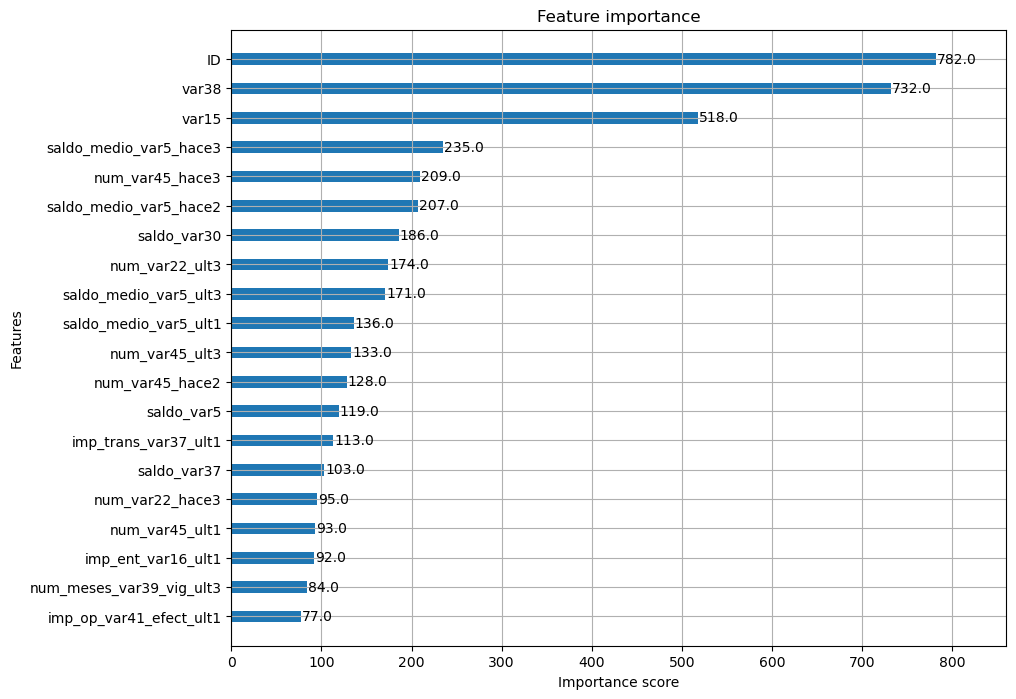

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

plt.show()

In [170]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_round=100)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm'

[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13637
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 249
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	training's auc: 0.906095	training's binary_logloss: 0.11576	valid_1's auc: 0.830248	valid_1's binary_logloss: 0.134543
ROC AUC: 0.8377


In [87]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [171]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386
2,lgbm,0.8377
3,lgbm_ft,0.8401
4,lgbm_scaled,0.8391
5,lgbm_scaled_ft,0.8387


In [176]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1), 
                     'max_depth': hp.quniform('max_depth', 100, 160, 1), 
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1), 
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [177]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              early_stopping_rounds=30,
                              num_leaves = int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']), 
                              min_child_samples=int(search_space['min_child_samples']), 
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate'])
    # 3-fold
    kf=KFold(n_splits=3)

    # 3-fold cv 스코어를 담을 리스트 생성
    roc_auc_list = []
    
    # X_train을 학습용, 검증용 으로 분리하기
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        eval_set = [(X_tr, y_tr), (X_val, y_val)]

        lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

        # 1로 예측한 확률값 추출 -> roc_auc 계산, 평균 계산을 위해 리스트에 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)

In [178]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, 
            space=lgbm_search_space, 
            algo=tpe.suggest, 
            max_evals=50, 
            trials=trials, 
            rstate=np.random.default_rng(seed=30))

print(f'best: {best}')

[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] Number of positive: 1617, number of negative: 38927                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006654 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13059                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039883 -> initscore=-3.181116                                        
[LightGBM]

In [179]:
print(best['num_leaves'], 
      best['max_depth'], 
      best['min_child_samples'], 
      best['subsample'], 
      best['learning_rate'], sep='\n')

32.0
101.0
94.0
0.7694719136506488
0.048074925843529494


In [180]:
lgbm_clf = LGBMClassifier(n_estimators=100,
                          early_stopping_rounds=100,
                          num_leaves = int(best['num_leaves']),
                          max_depth=int(best['max_depth']), 
                          min_child_samples=int(best['min_child_samples']), 
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5))

lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm_ft'

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13209
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 193
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[49]	training's auc: 0.88482	training's binary_logloss: 0

In [94]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [183]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386
2,lgbm,0.8377
3,lgbm_ft,0.8414
4,lgbm_scaled,0.8391
5,lgbm_scaled_ft,0.8387


In [184]:
cust_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [185]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
from sklearn.decomposition import PCA
cumulative_variance_ratio
pca = PCA()

pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [187]:
# 각 주성분의 분산 기여율
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 기여율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

pca_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance_ratio
})

pca_df

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.619070,0.619070
1,PC2,0.152909,0.771979
2,PC3,0.072563,0.844542
3,PC4,0.063316,0.907858
4,PC5,0.035373,0.943231
...,...,...,...
365,PC366,0.000000,1.000000
366,PC367,0.000000,1.000000
367,PC368,0.000000,1.000000
368,PC369,0.000000,1.000000


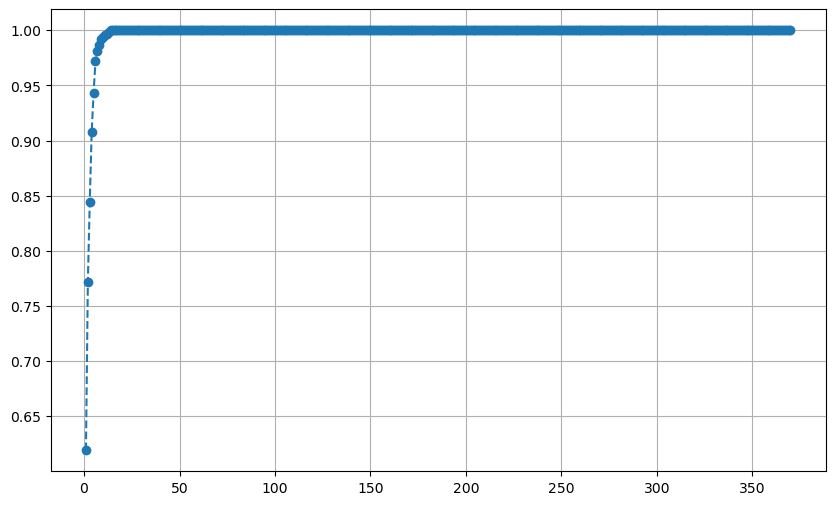

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.grid(True)
plt.show()

In [189]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [190]:
X_scaled_df = pd.DataFrame(data=X_scaled)

In [191]:
X_pca_df = pd.DataFrame(data=X_pca, 
                        columns=[f'PC{i+1}' for i in range(X_scaled_pca.shape[1])])

In [192]:
X_scaled_df.shape, X_pca_df.shape

((76020, 370), (76020, 5))

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [205]:
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_round=100)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm_scaled'

[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13636
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 249
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[38]	training's auc: 0.907745	training's binary_logloss: 0.115095	valid_1's auc: 0.828938	valid_1's binary_logloss: 0.134587
ROC AUC: 0.8389


In [143]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [208]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386
2,lgbm,0.8377
3,lgbm_ft,0.8414
4,lgbm_scaled,0.8389
5,lgbm_scaled_ft,0.8396


In [209]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, 
            space=lgbm_search_space, 
            algo=tpe.suggest, 
            max_evals=50, 
            trials=trials, 
            rstate=np.random.default_rng(seed=30))

print(f'best: {best}')

[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] Number of positive: 1617, number of negative: 38927                                                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008165 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13058                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195                          
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039883 -> initscore=-3.181116                                        
[LightGBM] [Info] Start training from score -3.181116                     

In [210]:
lgbm_clf = LGBMClassifier(n_estimators=100,
                          early_stopping_rounds=100,
                          num_leaves = int(best['num_leaves']),
                          max_depth=int(best['max_depth']), 
                          min_child_samples=int(best['min_child_samples']), 
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5))

eval_set = eval_set=[(X_tr, y_tr), (X_val, y_val)]

lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm_scaled_ft'

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13208
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 193
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.896602	training's binary_logloss:

In [ ]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [212]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386
2,lgbm,0.8377
3,lgbm_ft,0.8414
4,lgbm_scaled,0.8389
5,lgbm_scaled_ft,0.8396


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [214]:
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_round=100)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm_pca'

[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	training's auc: 0.698258	training's binary_logloss: 0.155431	valid_1's auc: 0.616868	valid_1's binary_logloss: 0.15981
ROC AUC: 0.6260


In [215]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [216]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, 
            space=lgbm_search_space, 
            algo=tpe.suggest, 
            max_evals=50, 
            trials=trials, 
            rstate=np.random.default_rng(seed=30))

print(f'best: {best}')

[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] Number of positive: 1617, number of negative: 38927                                                  
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001977 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275                                                                                      
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 5                            
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039883 -> initscore=-3.181116                                        
[LightGBM] [Info] Start training from score -3.181116                     

In [217]:
lgbm_clf = LGBMClassifier(n_estimators=100,
                          early_stopping_rounds=100,
                          num_leaves = int(best['num_leaves']),
                          max_depth=int(best['max_depth']), 
                          min_child_samples=int(best['min_child_samples']), 
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5))

eval_set = eval_set=[(X_tr, y_tr), (X_val, y_val)]

lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {lgbm_roc_score:.4f}')

model = 'lgbm_pca_ft'

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1691, number of negative: 40880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 5
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039722 -> initscore=-3.185321
[LightGBM] [Info] Start training from score -3.185321
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[48]	training's auc: 0.703319	training's binary_logloss: 0.1

In [218]:
new_row = {'model': model, 'auc_score': f'{lgbm_roc_score:.4f}'}
scores_df.loc[len(scores_df)] = new_row

In [219]:
scores_df

,model,auc_score
0,xgboost_ft,0.8393
1,xgboost,0.8386
2,lgbm,0.8377
3,lgbm_ft,0.8414
4,lgbm_scaled,0.8389
5,lgbm_scaled_ft,0.8396
6,lgbm_pca,0.6260
7,lgbm_pca_ft,0.6215
